# Linear Regression

Objective: EDA Real Estate data and prediction using Linear Regression  
Dataset: realestate.csv   
Ref: NA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

data = pd.read_csv('realestate.csv')
print('Dataset size', data.shape)
data.head()

Dataset size (414, 8)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,"2,012.92",32.00,84.88,10,24.98,121.54,37.90
1,2,"2,012.92",19.50,306.59,9,24.98,121.54,42.20
2,3,"2,013.58",13.30,561.98,5,24.99,121.54,47.30
3,4,"2,013.50",13.30,561.98,5,24.99,121.54,54.80
4,5,"2,012.83",5.00,390.57,5,24.98,121.54,43.10


In [2]:
#rename column
data.columns = ['No','TrxDate','HouseAge','MRT_Distance','NoStores','Long','Lat','Price']
data.head()

,No,TrxDate,HouseAge,MRT_Distance,NoStores,Long,Lat,Price
0,1,"2,012.92",32.00,84.88,10,24.98,121.54,37.90
1,2,"2,012.92",19.50,306.59,9,24.98,121.54,42.20
2,3,"2,013.58",13.30,561.98,5,24.99,121.54,47.30
3,4,"2,013.50",13.30,561.98,5,24.99,121.54,54.80
4,5,"2,012.83",5.00,390.57,5,24.98,121.54,43.10


In [3]:
#drop column
data.drop(['No','TrxDate','Long','Lat'],axis=1,inplace=True)
data.head()

,HouseAge,MRT_Distance,NoStores,Price
0,32.00,84.88,10,37.90
1,19.50,306.59,9,42.20
2,13.30,561.98,5,47.30
3,13.30,561.98,5,54.80
4,5.00,390.57,5,43.10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
HouseAge        414 non-null float64
MRT_Distance    414 non-null float64
NoStores        414 non-null int64
Price           414 non-null float64
dtypes: float64(3), int64(1)
memory usage: 13.0 KB


## Correlation

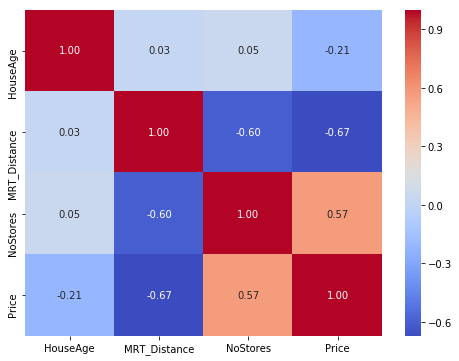

In [5]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [6]:
corr_rank = data.corr()
corr_rank["Price"].sort_values(ascending=False)

Price           1.00
NoStores        0.57
HouseAge       -0.21
MRT_Distance   -0.67
Name: Price, dtype: float64

## Split Train Test

In [7]:
stt = np.random.rand(len(data)) < 0.8
train = data[stt]
test = data[~stt]

print(train.shape)
train.head()

(326, 4)


,HouseAge,MRT_Distance,NoStores,Price
0,32.00,84.88,10,37.90
2,13.30,561.98,5,47.30
3,13.30,561.98,5,54.80
4,5.00,390.57,5,43.10
5,7.10,"2,175.03",3,32.10


In [8]:
print(test.shape)
test.head()

(88, 4)


,HouseAge,MRT_Distance,NoStores,Price
1,19.50,306.59,9,42.20
6,34.50,623.47,7,40.30
9,17.90,"1,783.18",3,22.10
12,13.00,492.23,5,39.30
22,14.70,"1,360.14",1,24.60


## Modelling 1: NoStores

Coefficient: [[2.62294555]]
Intercept  : [27.02667835]


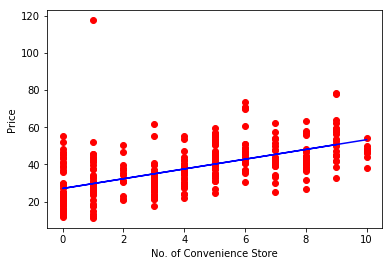

In [9]:
#Using SKlearn Package to model data
from sklearn import linear_model
regr_en = linear_model.LinearRegression()
train_x1 = np.asanyarray(train[['NoStores']])
train_y1 = np.asanyarray(train[['Price']])
regr_en.fit(train_x1,train_y1)

print('Coefficient:', regr_en.coef_)
print('Intercept  :', regr_en.intercept_)

#Plot line into Scatter Plot 
plt.scatter(train.NoStores, train.Price, color='red')
plt.plot(train_x1, regr_en.coef_[0][0] * train_x1 + regr_en.intercept_[0], '-b')
plt.xlabel("No. of Convenience Store")
plt.ylabel("Price")
plt.show()

In [10]:
#Check model accuracy
from sklearn.metrics import r2_score

test_x1 = np.asanyarray(test[['NoStores']])
test_y1 = np.asanyarray(test[['Price']])
test_y1_ = regr_en.predict(test_x1)

en_mae = np.mean(np.absolute(test_y1_ - test_y1))
en_mse = np.mean((test_y1_ - test_y1)**2)
en_r2 = r2_score(test_y1_ , test_y1)

print("Mean absolure error          : %.2f" % en_mae)
print("Residual sum of squares (MSE): %.2f" % en_mse)
print("R2-Score                     : %.2f" % en_r2)

Mean absolure error          : 8.06
Residual sum of squares (MSE): 111.19
R2-Score                     : -1.25


In [11]:
#Using Model 1 for prediction
new_nostores = 10

pred_en = regr_en.predict([[new_nostores]])
print("MRT Distance         : %.2f" % (new_nostores))
print("Predicted House Price: %.2f" % (pred_en))

MRT Distance         : 10.00
Predicted House Price: 53.26


## Modelling 2: MRT Distance

Coefficient: [[2.62294555]]
Intercept  : [27.02667835]


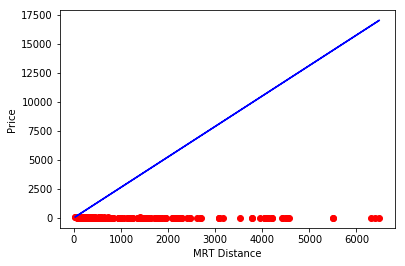

In [12]:
train_x2 = np.asanyarray(train[['MRT_Distance']])
train_y2 = np.asanyarray(train[['Price']])
regr_en.fit(train_x1,train_y1)

print('Coefficient:', regr_en.coef_)
print('Intercept  :', regr_en.intercept_)

#Plot line into Scatter Plot 
plt.scatter(train.MRT_Distance, train.Price, color='red')
plt.plot(train_x2, regr_en.coef_[0][0] * train_x2 + regr_en.intercept_[0], '-b')
plt.xlabel("MRT Distance")
plt.ylabel("Price")
plt.show()

In [13]:
test_x2 = np.asanyarray(test[['MRT_Distance']])
test_y2 = np.asanyarray(test[['Price']])
test_y2_ = regr_en.predict(test_x2)

en_mae2 = np.mean(np.absolute(test_y2_ - test_y2))
en_mse2 = np.mean((test_y2_ - test_y2)**2)
en_r3 = r2_score(test_y2_ , test_y2)

print("Mean absolure error          : %.2f" % en_mae2)
print("Residual sum of squares (MSE): %.2f" % en_mse2)
print("R2-Score                     : %.2f" % en_r3)

Mean absolure error          : 2270.34
Residual sum of squares (MSE): 11715180.80
R2-Score                     : -0.80


In [14]:
new_mrtd = 10
pred_en2 = regr_en.predict([[new_mrtd]])
print("MRT Distance         : %.2f" % (new_mrtd))
print("Predicted House Price: %.2f" % (pred_en2))

MRT Distance         : 10.00
Predicted House Price: 53.26
